In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy import integrate
import math

%matplotlib inline

In [2]:
f = lambda x: 3*x - np.cos(x+1)

*Наша функция имеет вид*:
$$ F(x) = 3*x - cos(x+1); \space x\in [-1, 1] $$

### #1

In [3]:
n = 5; a_x, b_x = -1, 1
x = np.linspace(-1, 1, 5); y = np.array([f(i) for i in x]); Q = np.zeros((n, 4))
for i in range(n):
    for j in range(4):
        Q[i][j] = x[i] ** j
H = np.dot(Q.T, Q); b = np.dot(Q.T, y); a = np.linalg.solve(H, b)

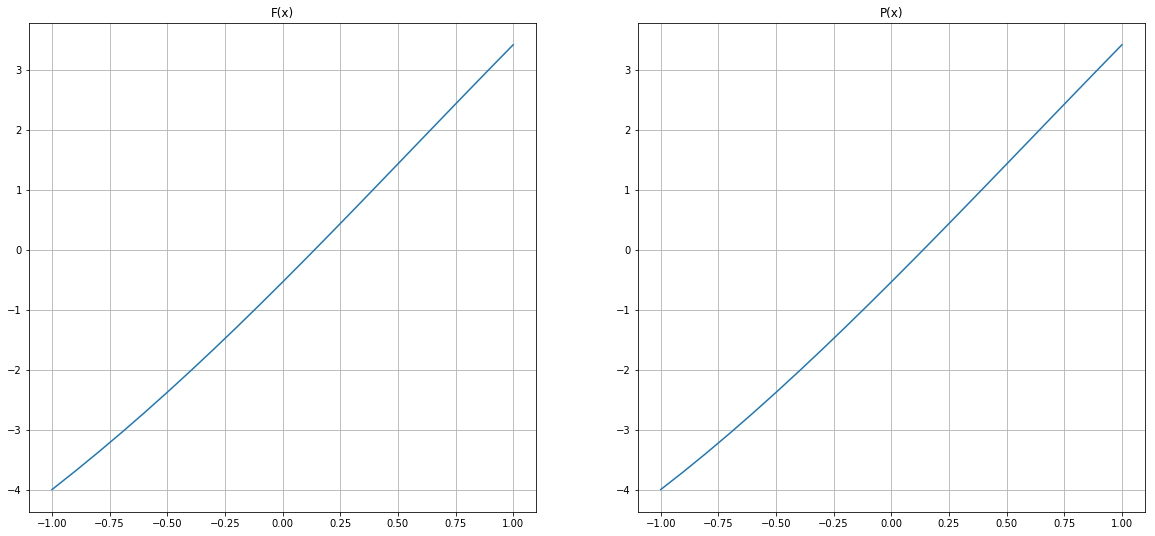

In [4]:
plt.figure(figsize=(20, 9))
x_gr = np.arange(a_x, b_x + .1, .1); y_gr = np.array([f(i) for i in x_gr])
plt.subplot(121); plt.title("F(x)"); plt.grid(True); plt.plot(x_gr,y_gr)

y_gr = np.array([sum(a[i] * (x ** i) for i in range(4)) for x in x_gr])
plt.subplot(122); plt.grid(True); plt.title("P(x)"); plt.plot(x_gr,y_gr);

### #2

In [5]:
L = lambda n, x: 1/(math.factorial(n)*(2**n)) * derivative(lambda x : (1 - x**2)**n, x, dx=1e-3, n=n, order=11)
c = lambda k: integrate.quad(lambda x: f(x)*L(k, x), a_x, b_x)[0] / integrate.quad(lambda x: L(k, x)**2, a_x, b_x)[0]
P = lambda x: sum([c(i) * L(i, x) for i in range(4)])

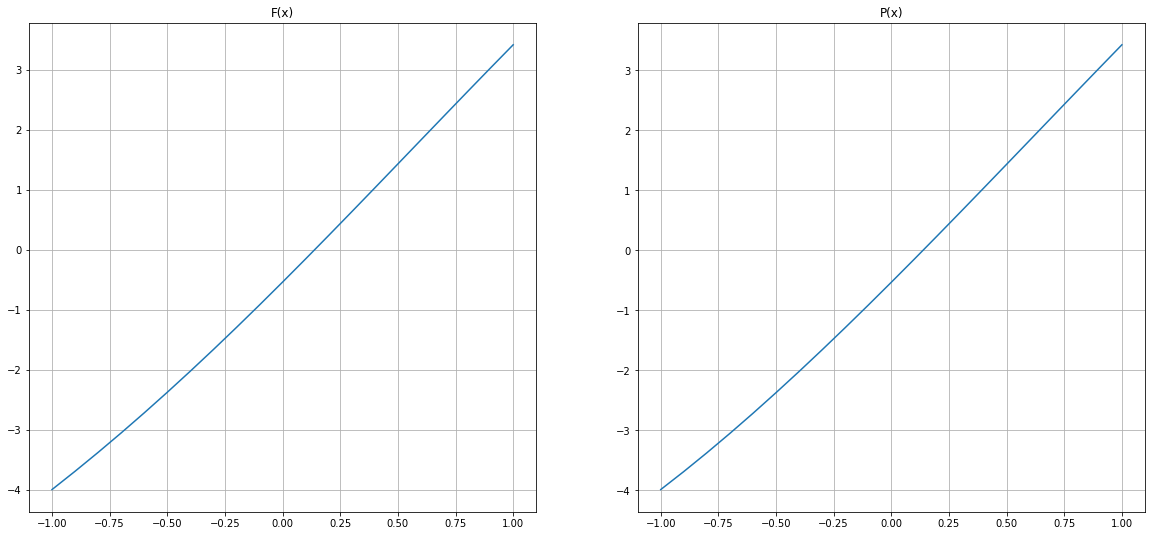

In [6]:
plt.figure(figsize=(20, 9))
x_gr = np.arange(a_x, b_x + .1, .1); y_gr = np.array([f(i) for i in x_gr])
plt.subplot(121); plt.title("F(x)"); plt.grid(True); plt.plot(x_gr,y_gr)

y_gr = np.array([P(i) for i in x_gr])
plt.subplot(122); plt.grid(True); plt.title("P(x)"); plt.plot(x_gr,y_gr);